# Initialize

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from keras import regularizers
from keras.optimizers import Adam 


# Load dataset

In [2]:
train = pd.read_csv('./data/0.8_train.csv', header=None)
test = pd.read_csv('./data/0.2_test.csv', header=None)

print("train_data : ", np.shape(train))
print("test_data  : ", np.shape(test))

train_data :  (24680, 441)
test_data  :  (6171, 441)


In [12]:
# 0.0 Normal beat
# 1.0 LBBB beat
# 2.0 RBBB beat
# 3.0 PVC beat
# 4.0 PAC beat

print('data train per class')
print(train[440].value_counts())
print('---------------------------------')
print('data test per class')
print(test[440].value_counts())

data train per class
0.0    7998
3.0    5579
1.0    4775
2.0    4308
4.0    2020
Name: 440, dtype: int64
---------------------------------
data test per class
0.0    1953
3.0    1413
1.0    1173
2.0    1118
4.0     514
Name: 440, dtype: int64


In [3]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
train_y=to_categorical(target_train)
test_y=to_categorical(target_test)
print(np.shape(train_y), np.shape(test_y))

(24680, 5) (6171, 5)


In [4]:
train_x = train.iloc[:,:train.shape[1]-1].values
test_x = test.iloc[:,:test.shape[1]-1].values
train_x = train_x.reshape(len(train_x), train_x.shape[1],1)
test_x = test_x.reshape(len(test_x), test_x.shape[1],1)
print(np.shape(train_x), np.shape(test_x))

(24680, 440, 1) (6171, 440, 1)


# Model architecture

In [13]:
# Instanciate an empty model
model = Sequential()

# Adding a Convolution Layer C1
model.add(Conv1D(filters=16, kernel_size=13, padding='same', activation='relu',input_shape=(440, 1)))

# Adding an Average Pooling Layer S2
model.add(AvgPool1D(pool_size=3, strides=2))

# Adding a Convolution Layer C3
model.add(Conv1D(filters=32, kernel_size=15, padding='same', activation='relu'))

# Adding an Average Pooling Layer S4
model.add(AvgPool1D(pool_size=3, strides=2))

# Adding a Convolution Layer C5
model.add(Conv1D(filters=64, kernel_size=17, padding='same', activation='relu'))

# Adding an Average Pooling Layer S6
model.add(AvgPool1D(pool_size=3, strides=2))

# Adding a Convolution Layer C7
model.add(Conv1D(filters=128, kernel_size=19, padding='same', activation='relu'))

# Adding an Average Pooling Layer S8
model.add(AvgPool1D(pool_size=3, strides=2))

# Flattening the layer 
model.add(Flatten())

# Dropout the layer S9
model.add(Dropout(0.5))

# Adding a Dense layer with regularization l2(0.0001)# S10
model.add(Dense(35,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))

# Adding a Dense layer with regularization l2(0.0001)# S11
model.add(Dense(5,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))

# Adding a Softmax layer S12
model.add(Softmax())

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 440, 16)           224       
                                                                 
 average_pooling1d_4 (Averag  (None, 219, 16)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_5 (Conv1D)           (None, 219, 32)           7712      
                                                                 
 average_pooling1d_5 (Averag  (None, 109, 32)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_6 (Conv1D)           (None, 109, 64)           34880     
                                                                 
 average_pooling1d_6 (Averag  (None, 54, 64)          

# learning_rate 1e-3, batch_size 32, epoch 50

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

In [15]:
history = model.fit(train_x, train_y, batch_size=32, epochs=50, verbose=1, validation_data=(test_x, test_y))

Epoch 1/50
772/772 [==============================] - 55s 70ms/step - loss: 0.3441 - accuracy: 0.8838 - val_loss: 0.1781 - val_accuracy: 0.9415
Epoch 2/50
772/772 [==============================] - 65s 85ms/step - loss: 0.1400 - accuracy: 0.9590 - val_loss: 0.1073 - val_accuracy: 0.9708
Epoch 3/50
772/772 [==============================] - 65s 84ms/step - loss: 0.1085 - accuracy: 0.9699 - val_loss: 0.1409 - val_accuracy: 0.9593
Epoch 4/50
772/772 [==============================] - 58s 75ms/step - loss: 0.0985 - accuracy: 0.9719 - val_loss: 0.0847 - val_accuracy: 0.9796
Epoch 5/50
772/772 [==============================] - 60s 78ms/step - loss: 0.0901 - accuracy: 0.9756 - val_loss: 0.0826 - val_accuracy: 0.9799
Epoch 6/50
772/772 [==============================] - 54s 70ms/step - loss: 0.0826 - accuracy: 0.9786 - val_loss: 0.0790 - val_accuracy: 0.9812
Epoch 7/50
772/772 [==============================] - 61s 79ms/step - loss: 0.0747 - accuracy: 0.9799 - val_loss: 0.0783 - val_accuracy:

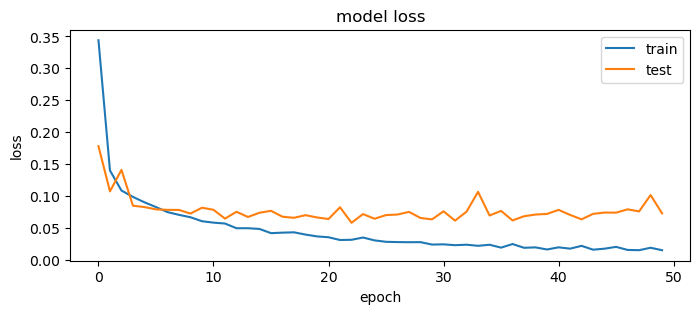

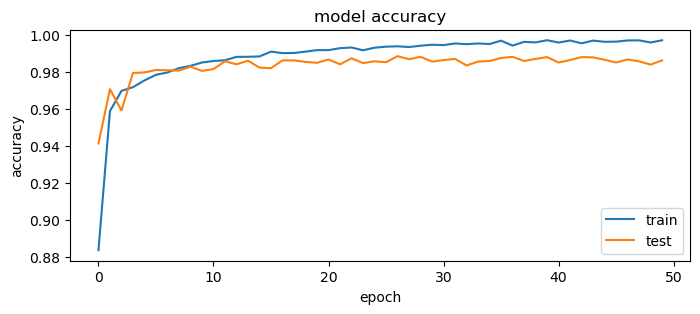

In [16]:
# summarize history for loss
plt.figure(figsize=(8,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for accuracy
plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [17]:
# finding the loss and acuracy of the model
score = model.evaluate(test_x, test_y)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

193/193 [==============================] - 2s 9ms/step - loss: 0.0727 - accuracy: 0.9864
Test Loss: 0.07270989567041397
Test accuracy: 0.9863879680633545


In [18]:
# save model
model.save('CNN_model_1')

INFO:tensorflow:Assets written to: CNN_model_1\assets


INFO:tensorflow:Assets written to: CNN_model_1\assets


# confusion matrix

In [19]:
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)
y_pred

193/193 [==============================] - 2s 9ms/step


array([1, 0, 4, ..., 2, 0, 2], dtype=int64)

In [21]:
y_true = test[440]

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
print(cm)
print('\nclassification report\n')
report = classification_report(y_true, y_pred, target_names=['N', 'L', 'R', 'V', 'A'], digits=4)
print(report )

def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df
report = report_to_df(report)

# report.to_csv('classification report.csv', index=True)

[[1929    0    6    5   13]
 [   3 1168    0    2    0]
 [   5    0 1106    6    1]
 [   6    1    0 1403    3]
 [  21    0    2   10  481]]

classification report

              precision    recall  f1-score   support

           N     0.9822    0.9877    0.9849      1953
           L     0.9991    0.9957    0.9974      1173
           R     0.9928    0.9893    0.9910      1118
           V     0.9839    0.9929    0.9884      1413
           A     0.9659    0.9358    0.9506       514

    accuracy                         0.9864      6171
   macro avg     0.9848    0.9803    0.9825      6171
weighted avg     0.9864    0.9864    0.9863      6171

